# Coordinate alignment between multi-slices

This notebook demonstrates the process of Aligning spatial transcriptome data. This is done in the following two steps.

1. Align spatial transcriptome data from a set of multi-slices;
2. (Optionally) Align spatial transcriptome data from two sets of multi-slices simultaneously.

 Here we modified a published method PASTE, which utilized Fused Gromov-Wasserstein Optimal Transport (FGW-OT) algorithm, to leverages
 both gene expression similarity and spatial distances between spots to align and integrate spatial transcriptomics data.

 **Reference**: Ron Zeira, Max Land, Benjamin J. Raphael. Alignment and Integration of Spatial Transcriptomics Data. bioRxiv, 2021.03.16.435604.
                doi: https://doi.org/10.1101/2021.03.16.435604

### Packages

In [1]:
import os
import anndata as ad
import spateo as st
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings("ignore")

/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:371: UserWarning: Trying to register the cmap 'fire' which already exists.
  plt.register_cmap("fire", fire_cmap)
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:372: UserWarning: Trying to register the cmap 'darkblue' which already exists.
  plt.register_cmap("darkblue", darkblue_cmap)
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:373: UserWarning: Trying to register the cmap 'darkgreen' which already exists.
  plt.register_cmap("darkgreen", darkgreen_cmap)
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:374: UserWarning: Trying to register the cmap 'darkred' which already exists.
  plt.register_cmap("darkred", darkred_cmap)
/home/yao/anaconda3/envs/BGIpy38_tf2/lib/python3.8/site-packages/spateo/configuration.py:375: UserWarning: Trying to register the cmap 'darkpurple' whic

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


### Data source

In [2]:
# data1
slices1_folder = "/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/1_segmentation/cellbin_h5ad"
slices1_files = [filename for root1, dirs1, files1 in os.walk(slices1_folder) for filename in files1]
slices1 = [ad.read(os.path.join(slices1_folder, slices1_file)) for slices1_file in slices1_files]

# data2
slices2_folder = "/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/1_segmentation/bin20_h5ad"
slices2_files = [filename for root2, dirs2, files2 in os.walk(slices2_folder) for filename in files2]
slices2 = [ad.read(os.path.join(slices2_folder, slices2_file)) for slices2_file in slices2_files]
########################################################################################################################

# save path
save_folder = "/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/2_alignment"
save_slices1_folder = os.path.join(save_folder, "cellbin_align_h5ad")
save_slices1_image_folder = os.path.join(save_folder, "cellbin_align_image")
save_slices2_folder = os.path.join(save_folder, "bin20_align_h5ad")
save_slices2_image_folder = os.path.join(save_folder, "bin20_align_image")

for folder in [save_folder, save_slices1_folder, save_slices1_image_folder, save_slices2_folder, save_slices2_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)


### Align spatial transcriptome data from a set of multi-slices

#### Slices alignment

In [3]:
# Slices alignment
align_slices1 = st.tl.slice_alignment(slices=slices1, spatial_key="spatial", key_added="align_spatial",
                                      numItermax=500, numItermaxEmd=100000, device="cuda:0")

# Save the aligned slices separately
for adata in align_slices1:
    adata.write_h5ad(filename=os.path.join(save_slices1_folder, f'{adata.obs["slices"][0]}.h5ad'), compression="gzip")

# Save the integrated aligned slices
# integrated_adata = st.tl.integrate(adatas=align_slices1, batch_key="slices")
# integrated_adata.write_h5ad(filename=os.path.join(save_folder, f'integrated_slices.h5ad'), compression="gzip")

|-----> [Slices alignment] in progress: 100.0000%
|-----> [Slices alignment] finished [135.2844s]


#### Visualization slices based on raw coordinates

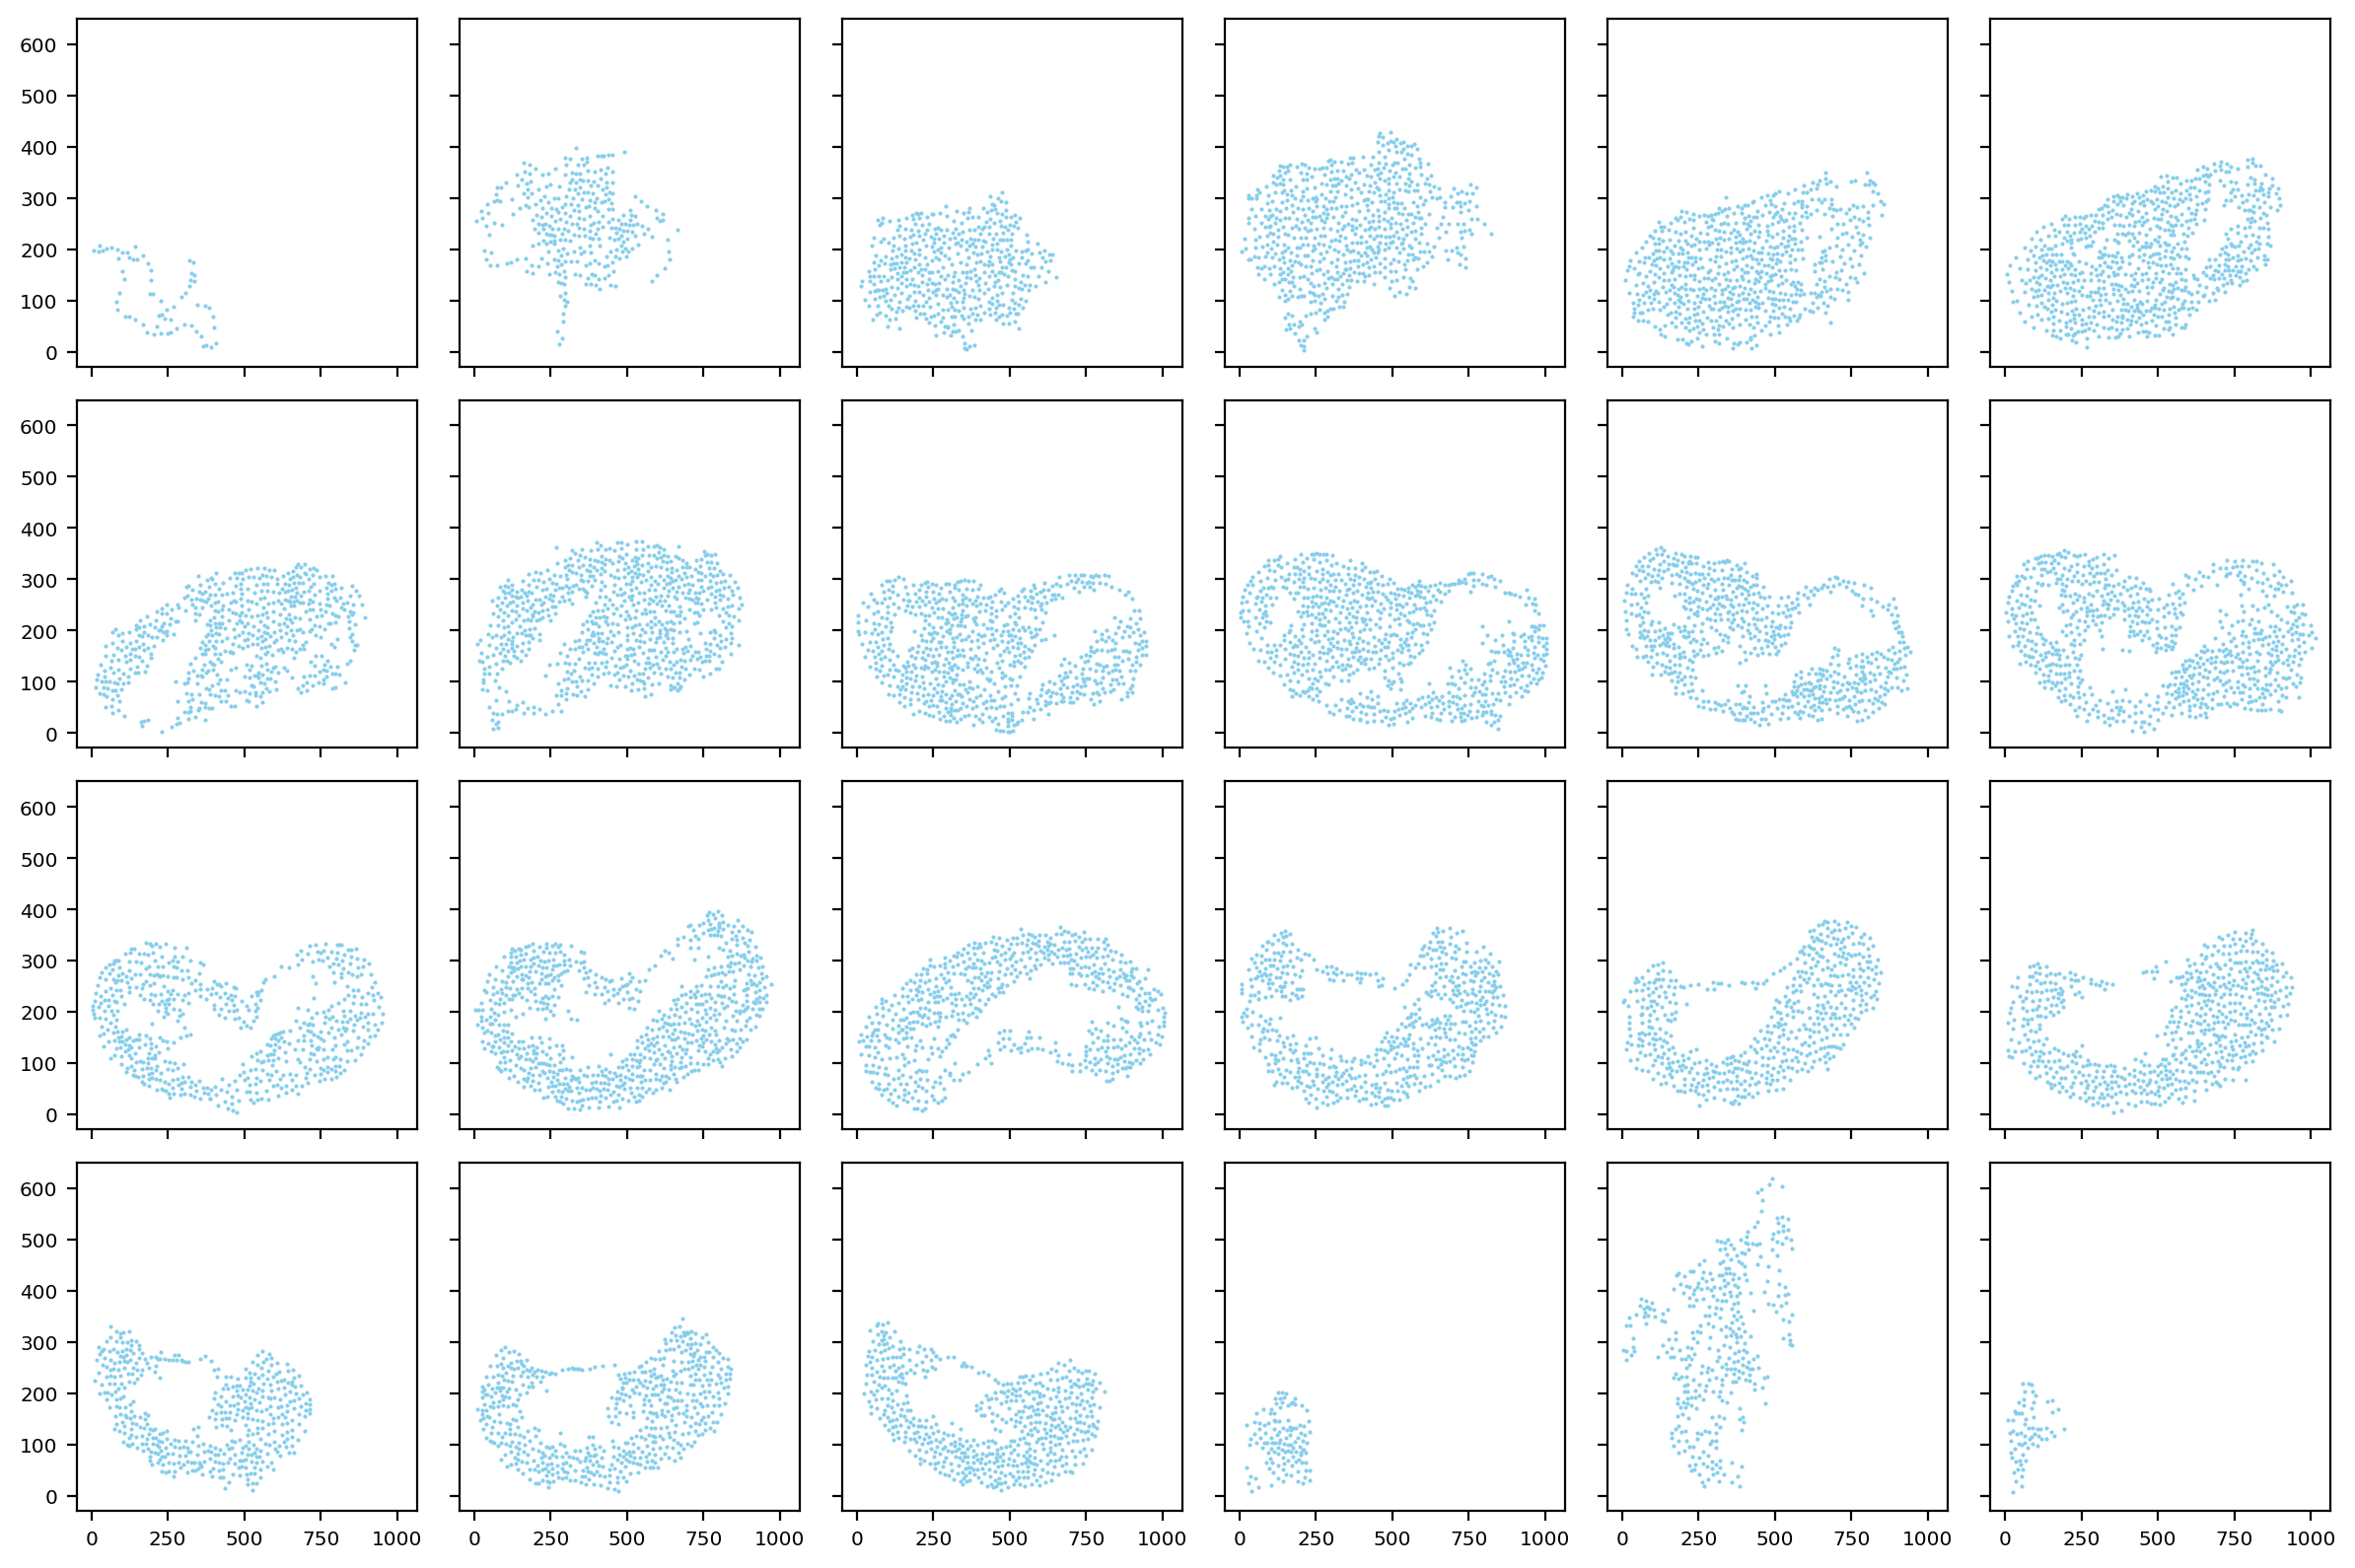

In [4]:
fig, axes = plt.subplots(4, 6, figsize=(12, 8),dpi=100,sharex='all',sharey='all')
for i, adata in enumerate(slices1):
    plt.subplot(4, 6, i+1)
    plt.scatter(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], c="skyblue", s=1)

plt.tight_layout()
plt.show()

#### Visualization slices based on aligned coordinates

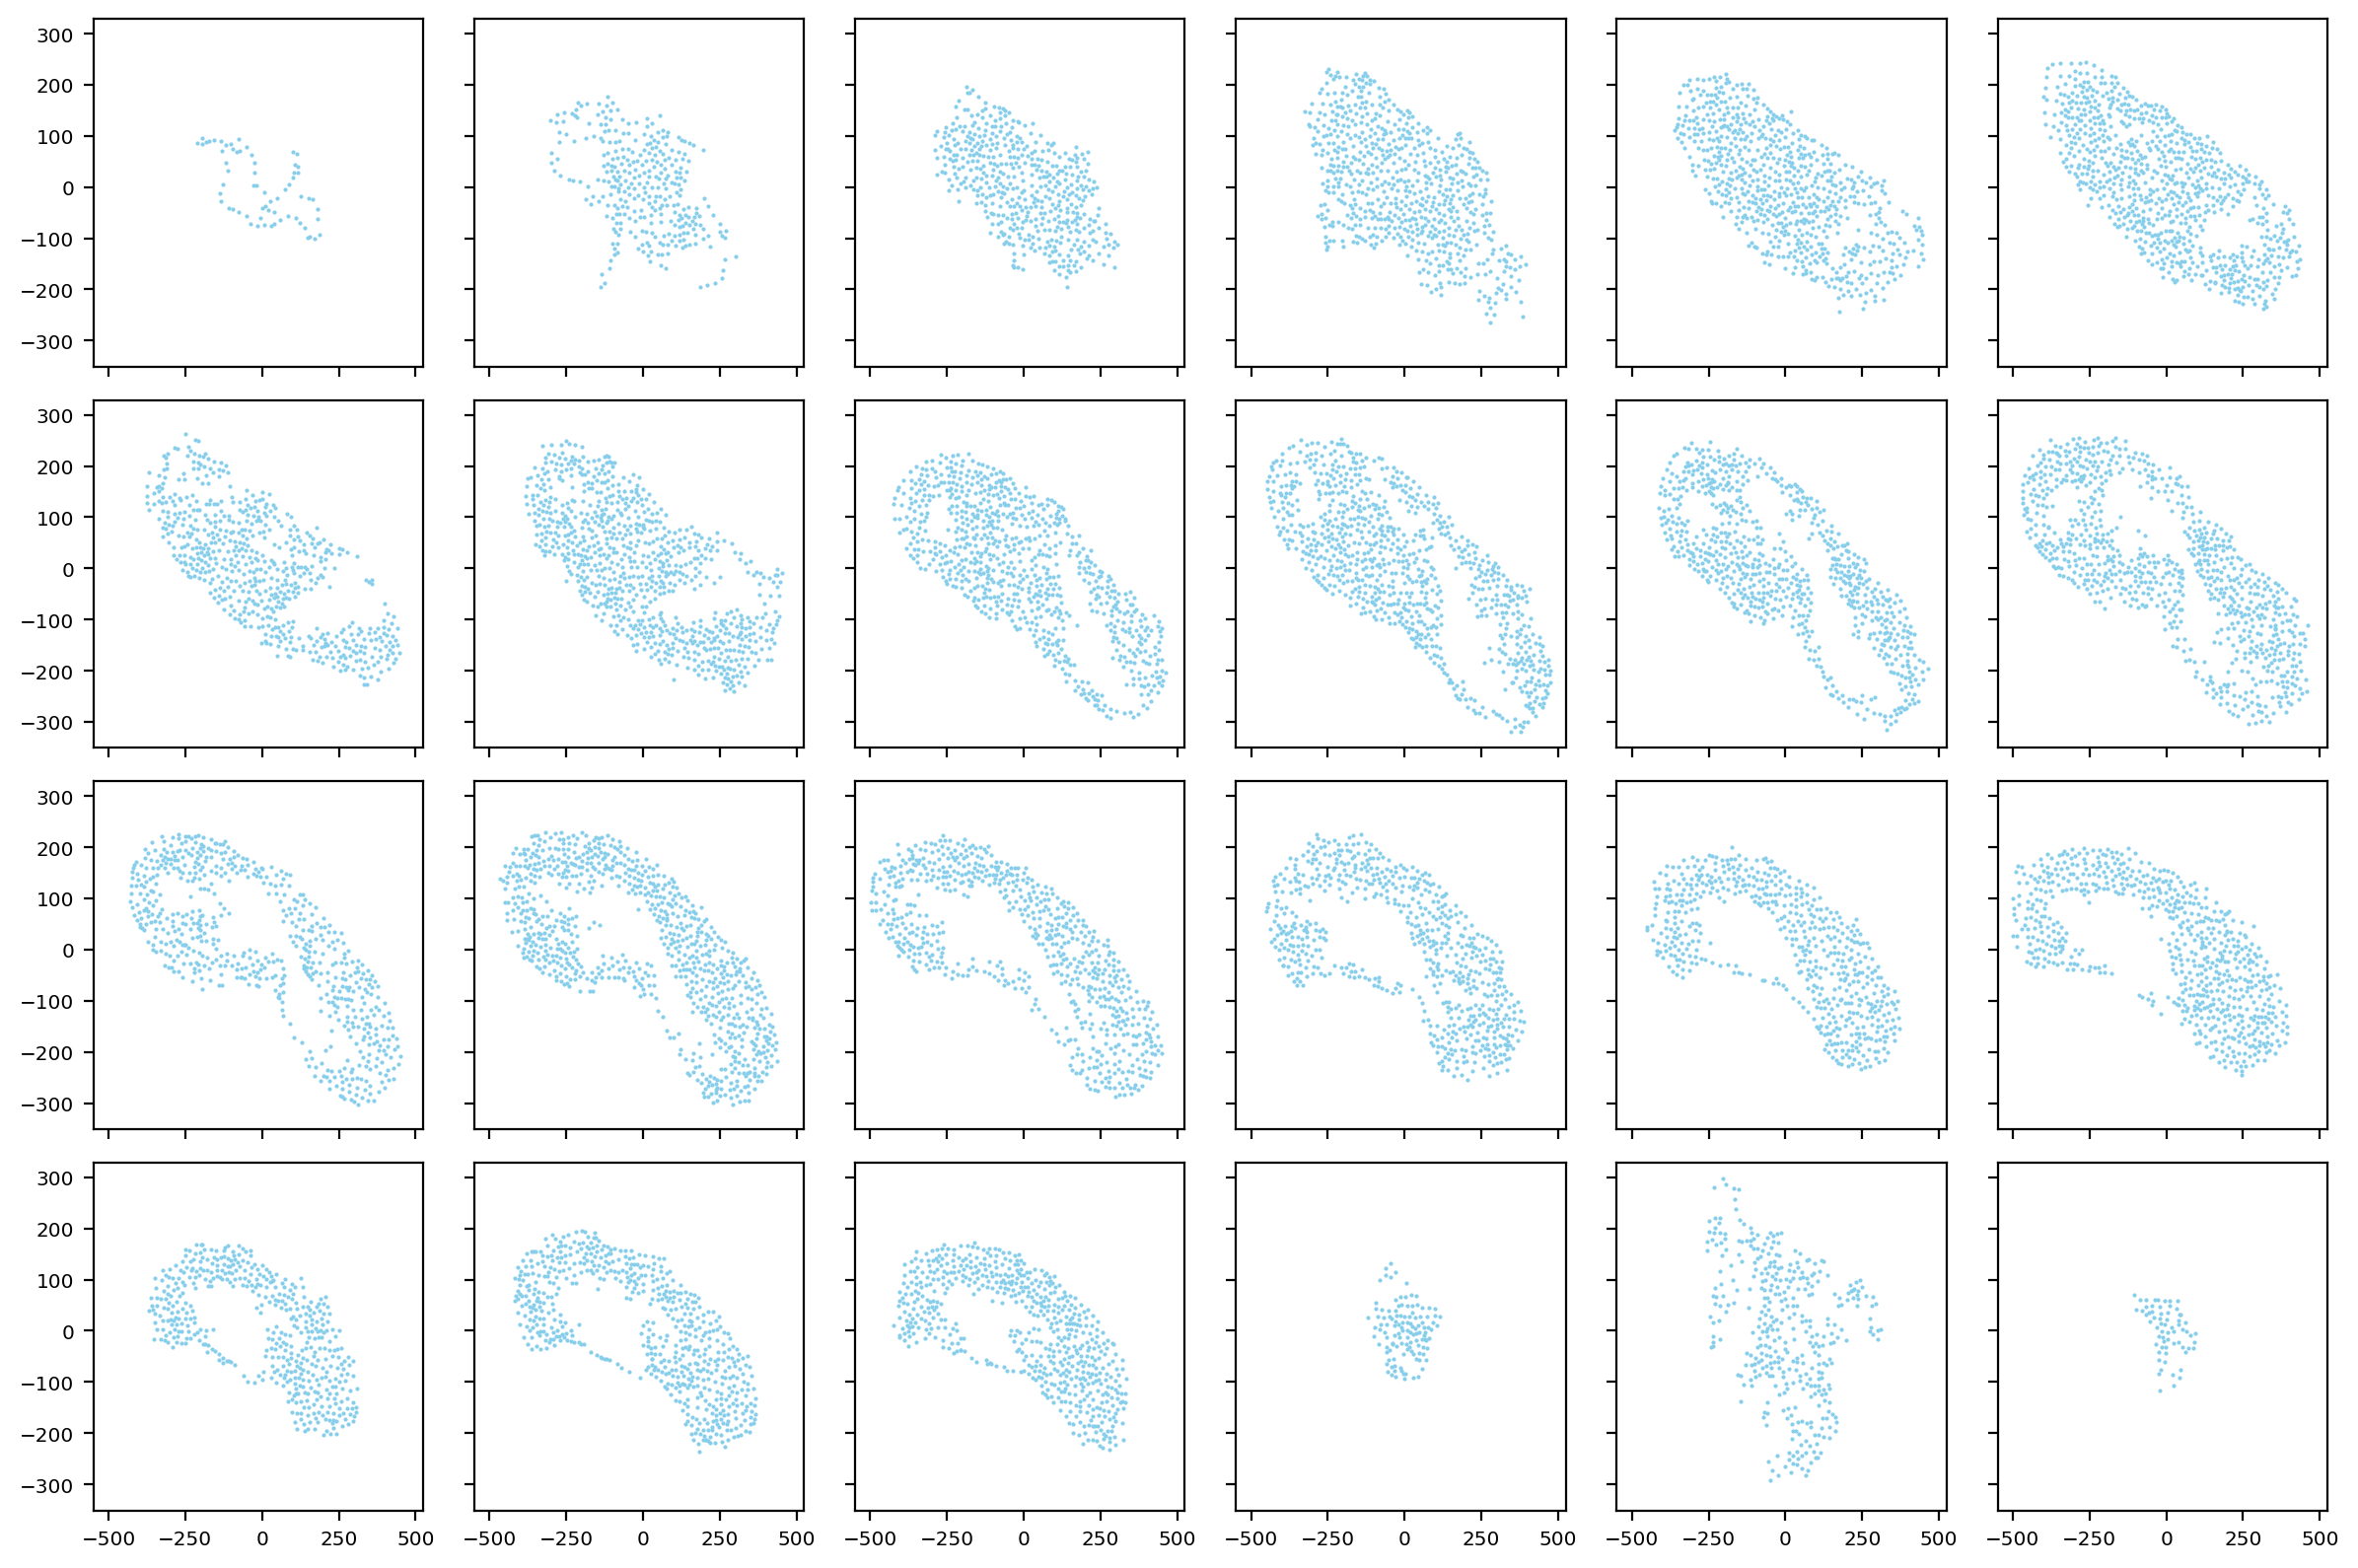

In [5]:
fig, axes = plt.subplots(4, 6, figsize=(12, 8),dpi=100,sharex='all',sharey='all')
for i, adata in enumerate(align_slices1):
    plt.subplot(4, 6, i+1)
    plt.scatter(x=adata.obsm["align_spatial"][:, 0], y=adata.obsm["align_spatial"][:, 1], c="skyblue", s=1)

plt.tight_layout()
plt.show()

### Align spatial transcriptome data from two sets of multi-slices simultaneously

#### Slices alignment

In [6]:
# Slices alignment
align_slices1, align_slices2 = st.tl.slice_alignment_bigBin(slices=slices1, slices_big=slices2, spatial_key="spatial", key_added="align_spatial",
                                                            numItermax=500, numItermaxEmd=100000, device="cuda:0")

# Save the aligned slices separately
for adata in align_slices1:
    adata.write_h5ad(filename=os.path.join(save_slices1_folder, f'{adata.obs["slices"][0]}.h5ad'), compression="gzip")
for adata in align_slices2:
    adata.write_h5ad(filename=os.path.join(save_slices2_folder, f'{adata.obs["slices"][0]}.h5ad'), compression="gzip")

# Save the integrated aligned slices
# integrated_adata = st.tl.integrate(adatas=align_slices1, batch_key="slices")
# integrated_adata.write_h5ad(filename=os.path.join(save_folder, f'integrated_slices.h5ad'), compression="gzip")

|-----> [Slices alignment] in progress: 100.0000%
|-----> [Slices alignment] finished [80.5393s]


#### Visualization slices based on raw coordinates

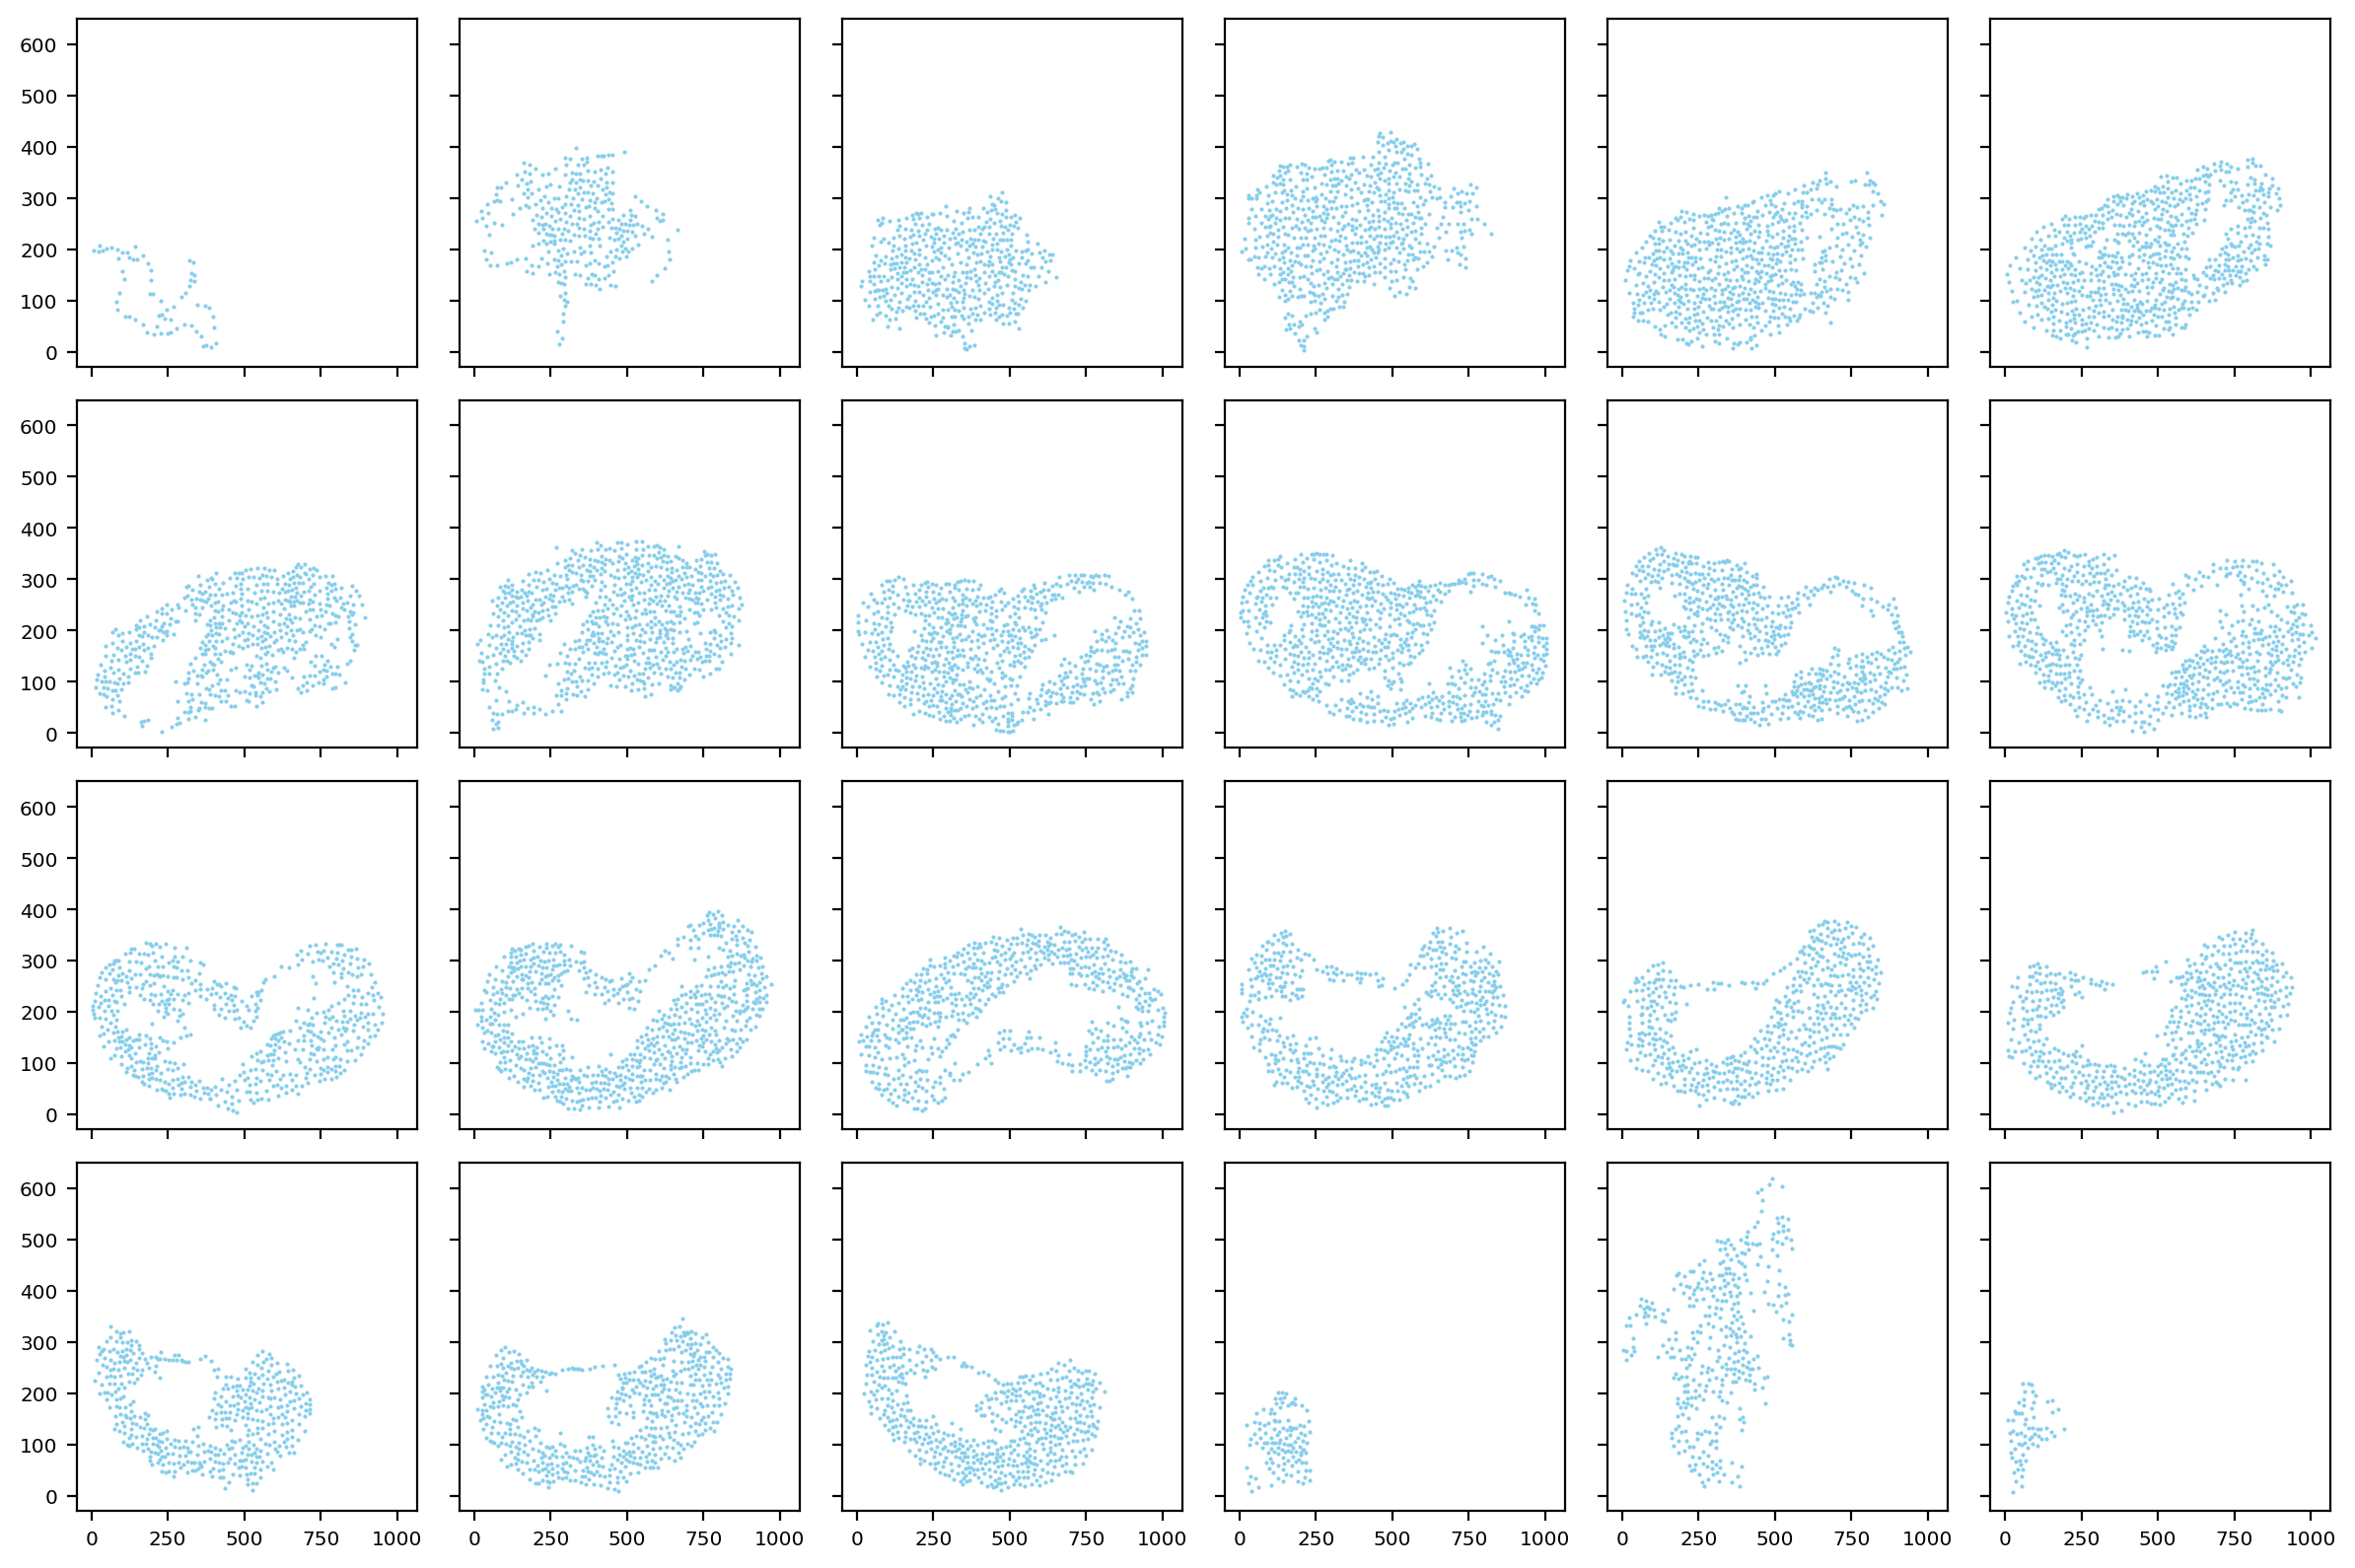

In [7]:
fig, axes = plt.subplots(4, 6, figsize=(12, 8),dpi=100,sharex='all',sharey='all')
for i, adata in enumerate(slices1):
    plt.subplot(4, 6, i+1)
    plt.scatter(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], c="skyblue", s=1)

plt.tight_layout()
plt.show()

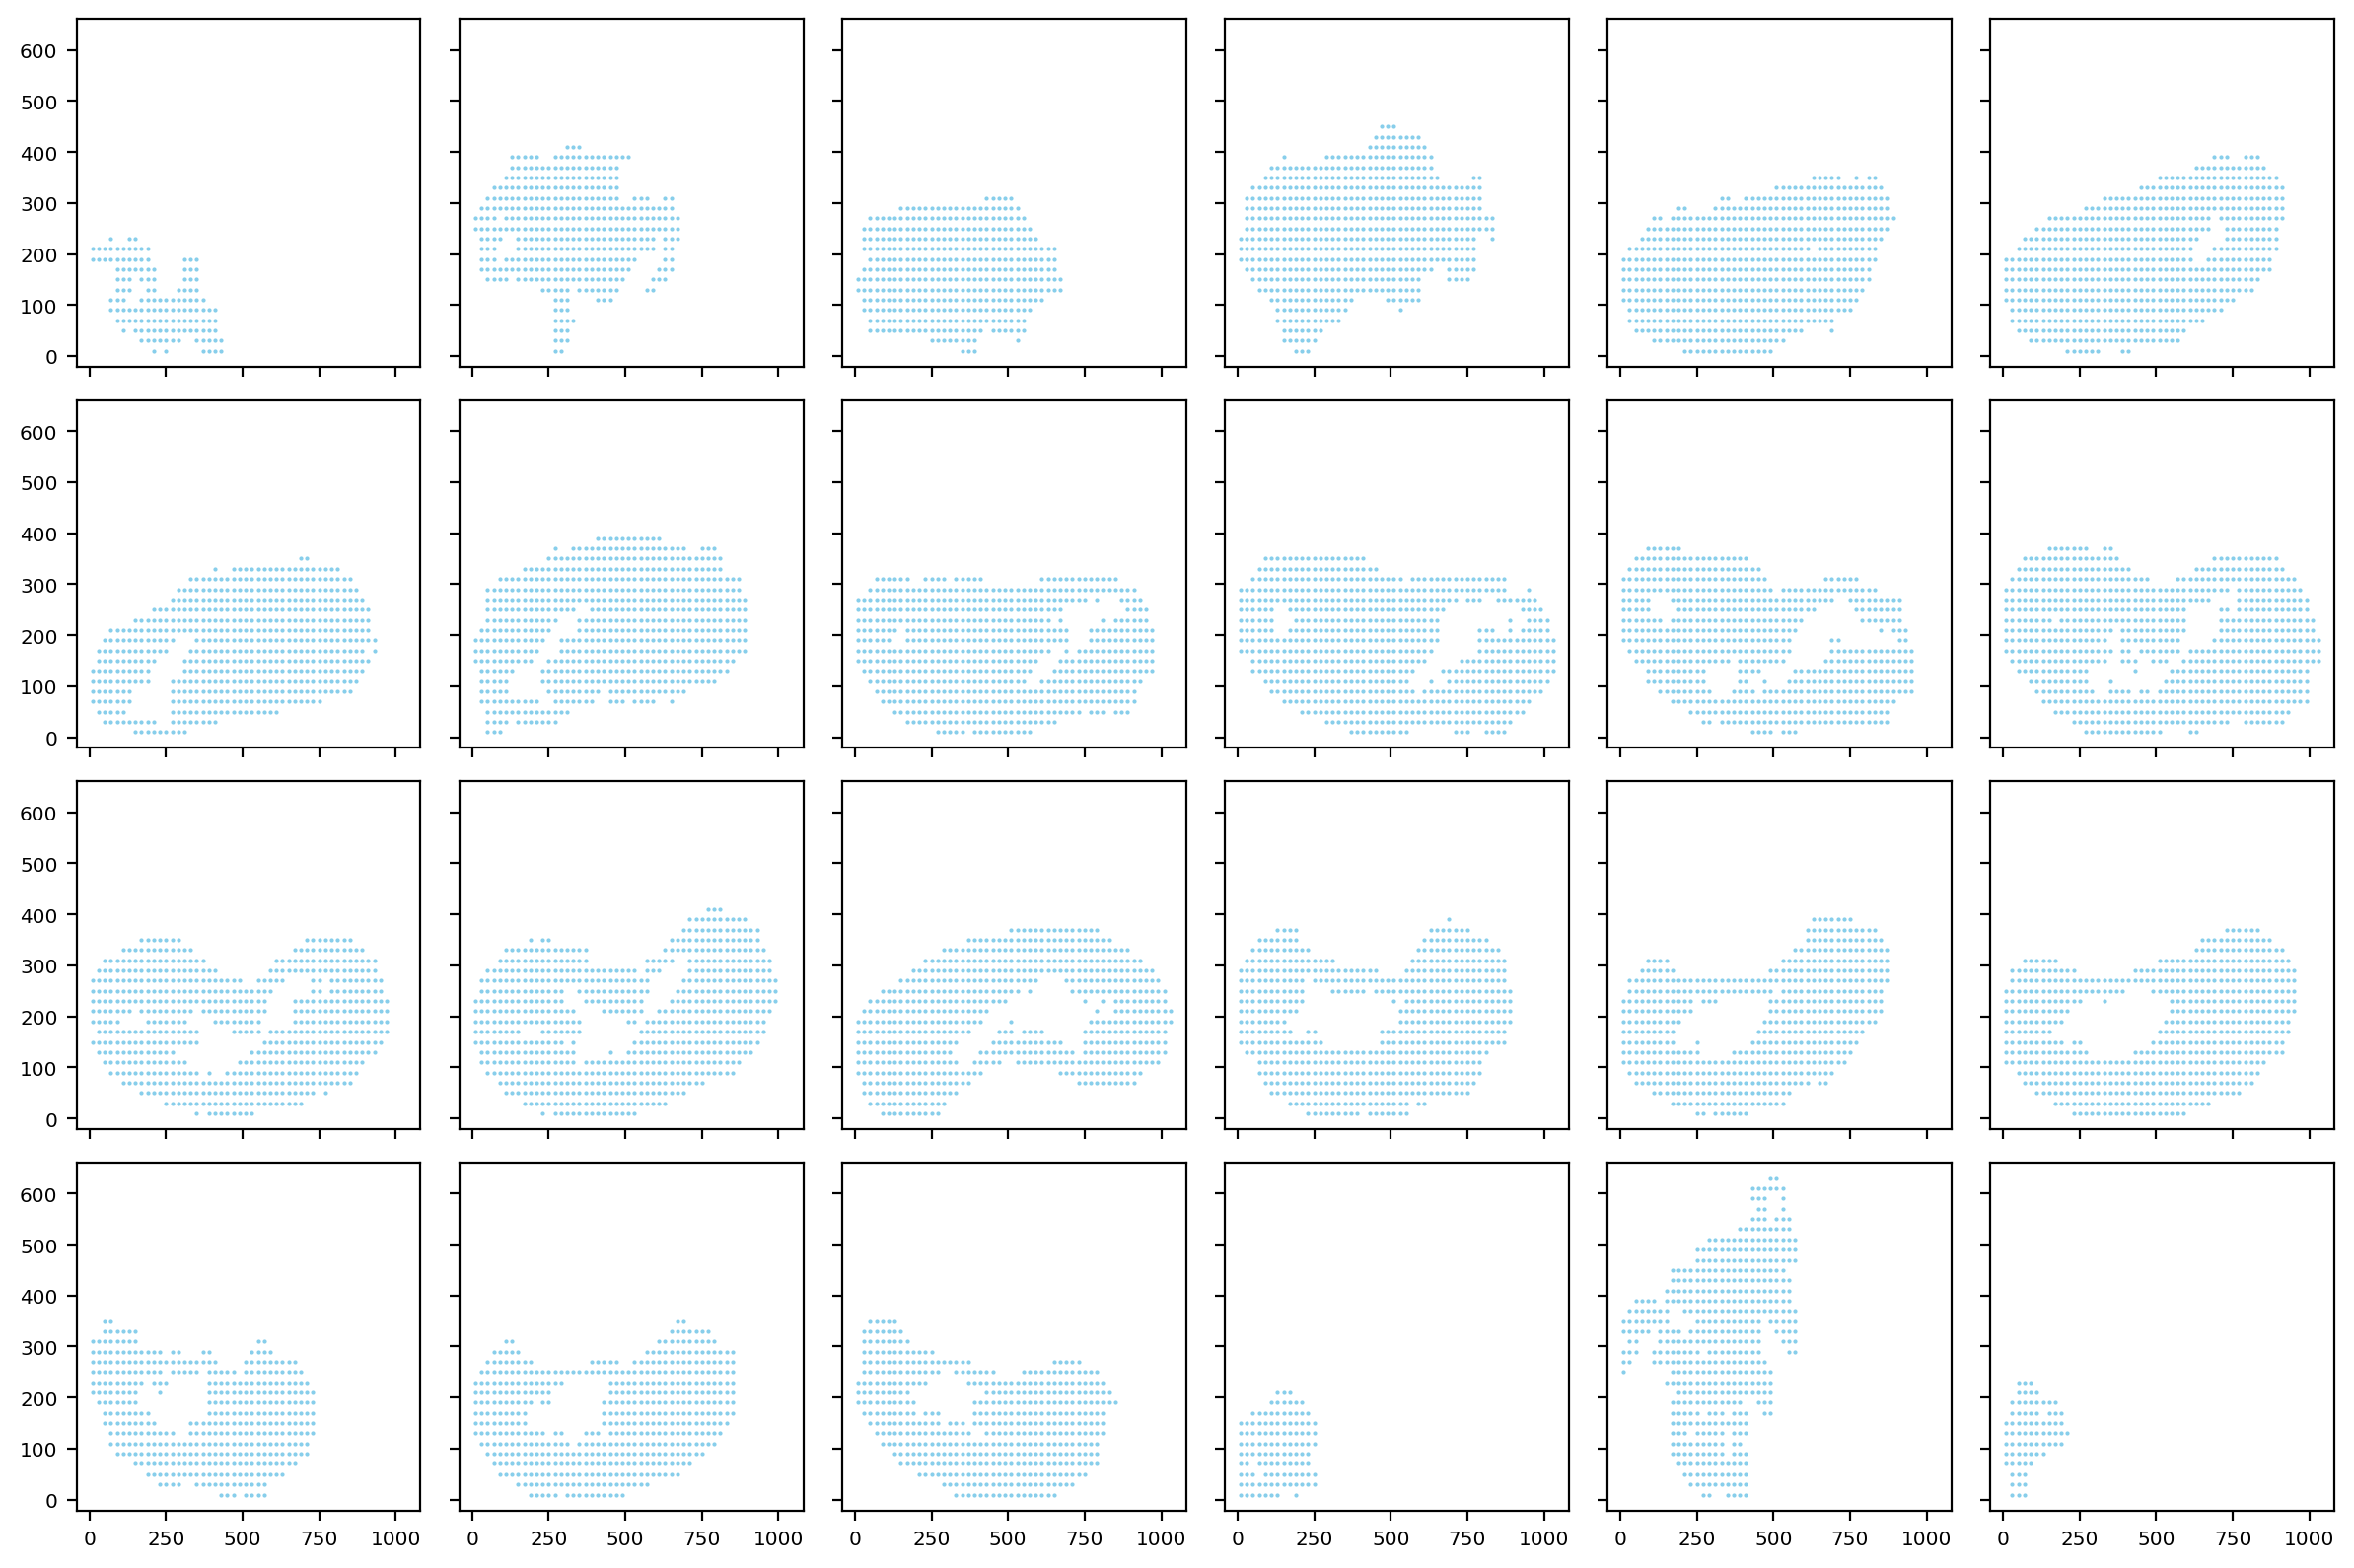

In [8]:
fig, axes = plt.subplots(4, 6, figsize=(12, 8),dpi=100,sharex='all',sharey='all')
for i, adata in enumerate(slices2):
    plt.subplot(4, 6, i+1)
    plt.scatter(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], c="skyblue", s=1)

plt.tight_layout()
plt.show()

#### Visualization slices based on aligned coordinates

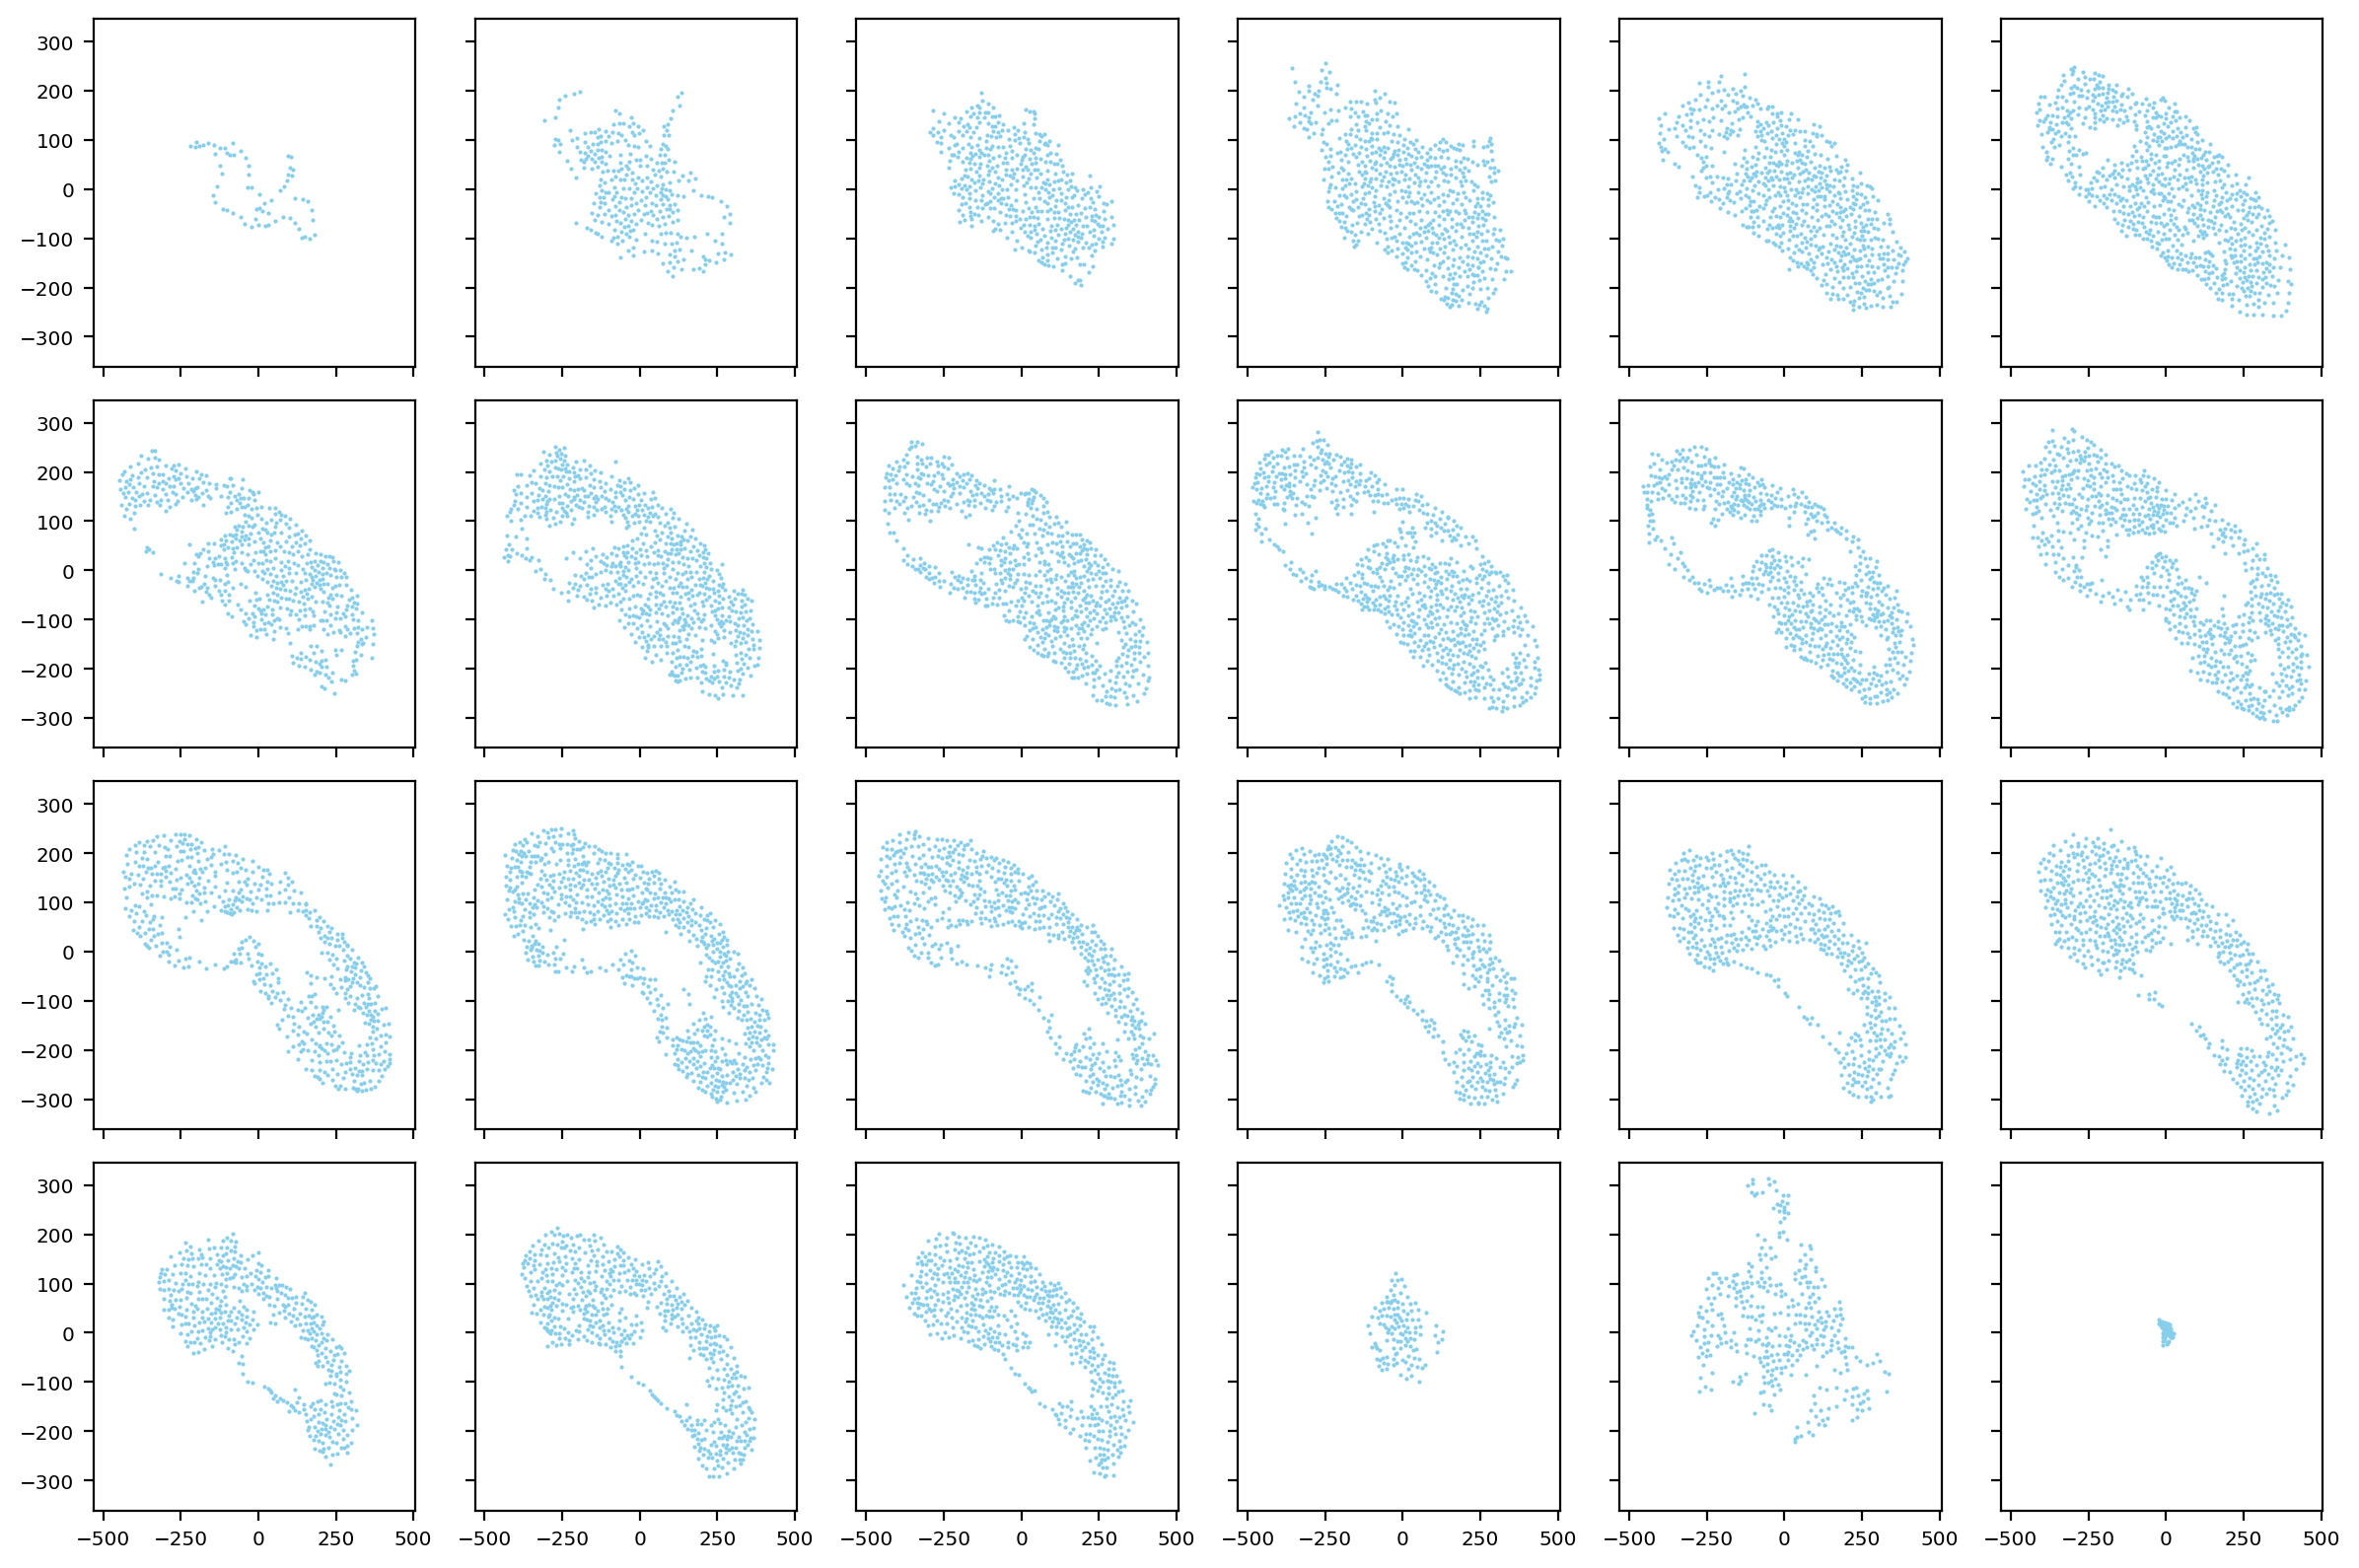

In [10]:
fig, axes = plt.subplots(4, 6, figsize=(12, 8),dpi=100,sharex='all',sharey='all')
for i, adata in enumerate(align_slices1):
    plt.subplot(4, 6, i+1)
    plt.scatter(x=adata.obsm["align_spatial"][:, 0], y=adata.obsm["align_spatial"][:, 1], c="skyblue", s=1)

plt.tight_layout()
plt.show()

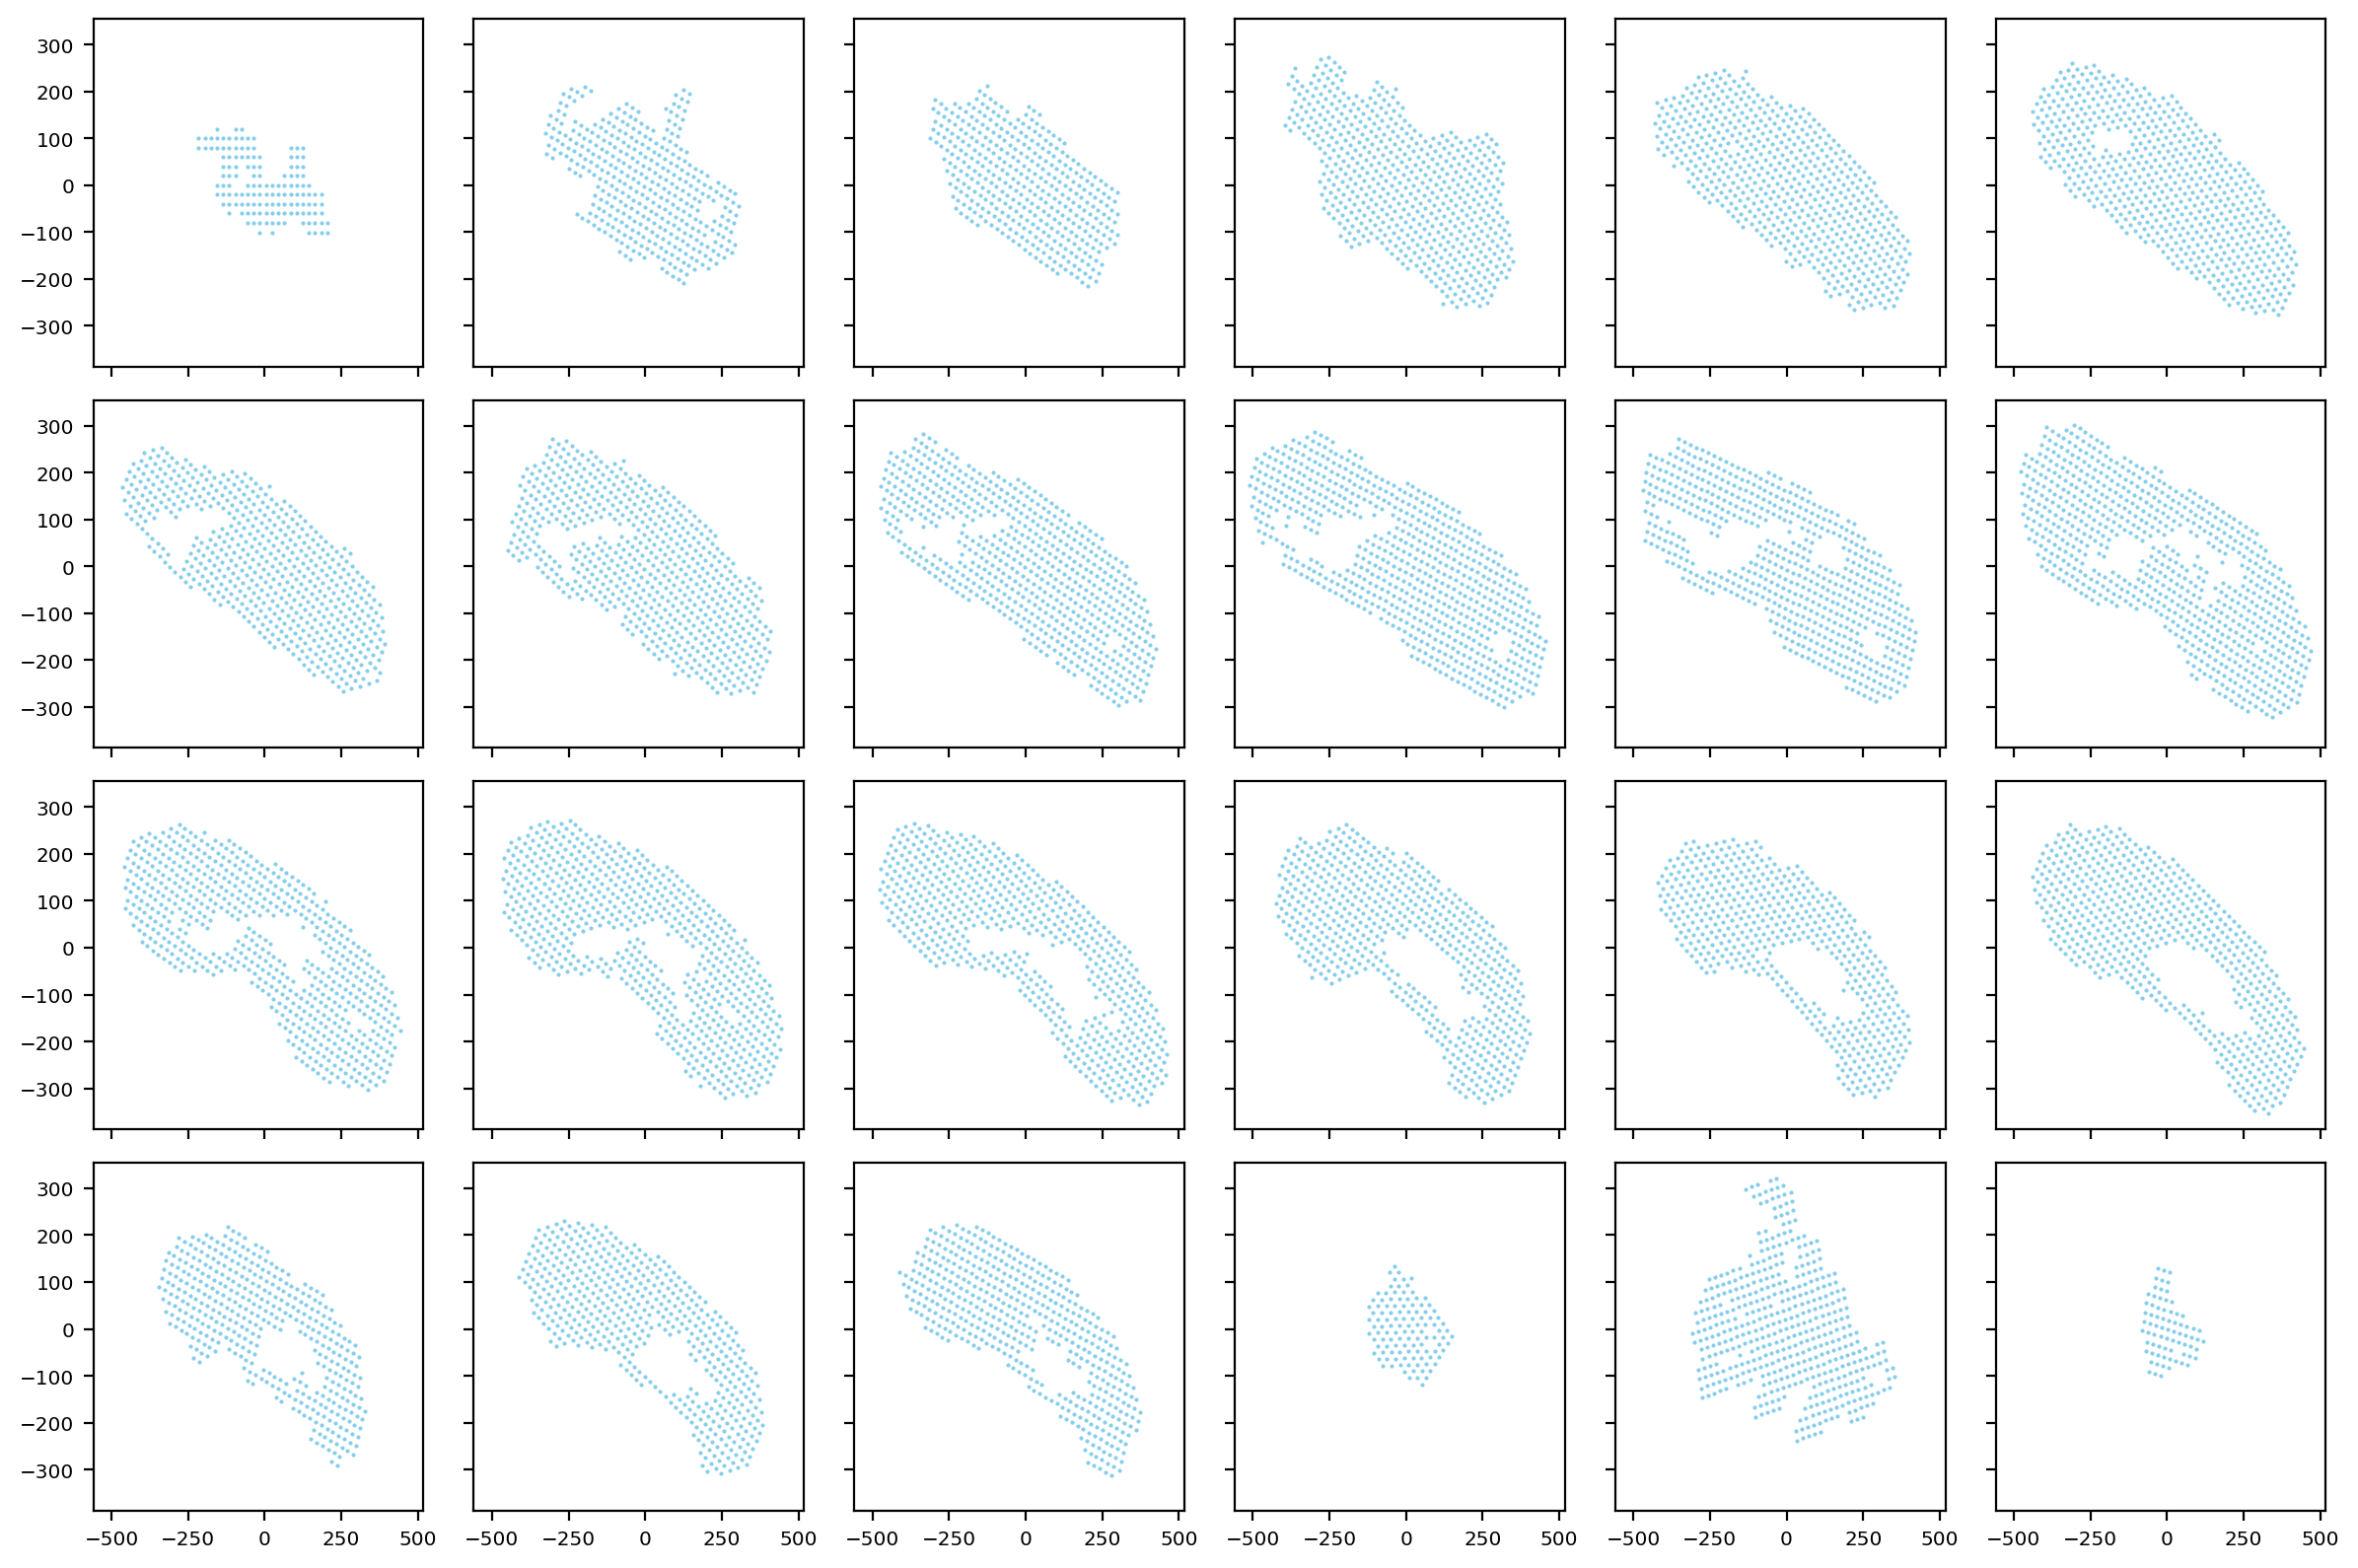

In [11]:
fig, axes = plt.subplots(4, 6, figsize=(12, 8),dpi=100,sharex='all',sharey='all')
for i, adata in enumerate(align_slices2):
    plt.subplot(4, 6, i+1)
    plt.scatter(x=adata.obsm["align_spatial"][:, 0], y=adata.obsm["align_spatial"][:, 1], c="skyblue", s=1)

plt.tight_layout()
plt.show()

### Comparing


**By comparing multi-slices alignment using cellbin spatial transcriptome data and multi-slices alignment using bin20 spatial transcriptome data,
we can find that the effect of the latter is much better than the former.**